![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [35]:
import pandas as pd
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


# StatsModel and Metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
df = pd.read_csv('data/kc_house_data.csv')


In [36]:
# # utils.py
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_train, train_preds, y_test, test_preds):
    '''
    Evaluate the amount of error between my model's predictionms and the actual values
    for both a train and a test set
    
    Inputs: 
        y_train - array like, actual values for 'price for my train dataset
        train_preds - array like, predicted values for 'price' for my train dataset
        y_test
        test_preds
    
    Outputs:
        None
    '''
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("*****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("*****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
    print("*****")
    
    # Calculate our residuals 
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds
    
    # Scatter plot 
    plt.scatter(train_preds, train_residuals, label = 'Train')
    plt.scatter(test_preds, test_residuals, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    
    sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
    plt.legend()
    
    sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
    plt.legend()
    plt.show()
    

In [37]:
df['view'].fillna(value='NONE',inplace=True)
df['waterfront'].replace("YES", 1, inplace=True)
df['waterfront'].replace("NO", 0, inplace=True)
df['waterfront'].fillna(value=0,inplace=True)
df['yr_renovated']= df['yr_renovated'].fillna(0.0)
df['bedrooms'].replace(33,3, inplace = True)
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']
df.drop(['lat','long'],1, inplace =  True)


In [38]:
obj_column = [c for c in df.columns if df[c].dtype == 'object']
df[obj_column].describe()

,date,view,condition,grade
count,21597,21597,21597,21597
unique,372,5,5,11
top,6/23/2014,NONE,Average,7 Average
freq,142,19485,14020,8974


In [39]:
view_col = df[["view"]]
condition_df = df[["condition"]]
grade_df = df[['grade']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe_view = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")
ohe_cond = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_grade = OneHotEncoder(categories = 'auto', sparse=False, handle_unknown ='ignore')

# Fit the encoder on view_col
ohe_view.fit(view_col)
ohe_cond.fit(condition_df)
ohe_grade.fit(grade_df)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [40]:
# Transform view_col using the encoder and
# assign the result to view_col_encoded
view_col_encoded = ohe_view.transform(view_col)
condition_df_encoded = ohe_cond.transform(condition_df)
grade_encoded = ohe_grade.transform(grade_df)

In [41]:
# Make the transformed data into a dataframe
view_col_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_col_encoded,
    # Set the column names to the categories found by OHE
    columns="view_"+ohe_view.categories_[0],
    # Set the index to match df's index
    index=df.index
)
condition_df_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_df_encoded,
    # Set the column names to the categories found by OHE
    columns="cond_"+ohe_cond.categories_[0],
    # Set the index to match df's index
    index=df.index
)
grade_encoded = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded,
    # Set the column names to the categories found by OHE
    columns="grade_"+ohe_grade.categories_[0],
    # Set the index to match df's index
    index=df.index
)

In [42]:
# Drop original view column
df.drop("view", axis=1, inplace=True)
df.drop("condition", axis=1, inplace=True)
df.drop("grade", axis=1, inplace=True)

# Concatenate the new dataframe with current df
df = pd.concat([df, view_col_encoded, condition_df_encoded, grade_encoded], axis=1)

# Visually inspect df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [43]:
X = df.drop(columns=['id', 'price'])
y = df['price']

In [44]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [45]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

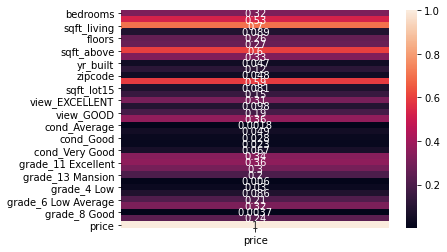

In [46]:
# Absolute value correlations with price
sns.heatmap(abs(train_df.corr())[['price']], annot=True);


In [47]:
np.abs(train_df.corr()['price']).sort_values(ascending = False)

price                  1.000000
sqft_living            0.700397
sqft_above             0.601355
sqft_living15          0.591150
bathrooms              0.529906
view_NONE              0.363970
grade_11 Excellent     0.359538
grade_10 Very Good     0.343478
sqft_basement          0.328176
bedrooms               0.320253
grade_7 Average        0.317165
view_EXCELLENT         0.306340
grade_12 Luxury        0.298478
waterfront             0.267665
floors                 0.257826
grade_9 Better         0.238251
grade_6 Low Average    0.210427
grade_13 Mansion       0.202751
view_GOOD              0.188906
view_AVERAGE           0.146068
yr_renovated           0.116552
view_FAIR              0.097989
sqft_lot               0.089019
grade_5 Fair           0.086128
sqft_lot15             0.080682
cond_Very Good         0.067110
cond_Fair              0.049162
zipcode                0.047865
yr_built               0.046835
grade_4 Low            0.030208
cond_Good              0.027691
cond_Poo

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

In [48]:
# code here to arrive at a baseline prediction
train_target_mean = y_train.mean()
train_target_mean

541284.4615669568

Train R2: 0.0000
Test R2: -0.0001
*****
Train RMSE: $366,333.44
Train RMSE: $370,425.86
*****
Train MAE: $234,722.63
Train MAE: $233,000.84
*****


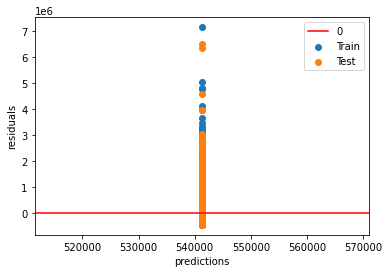

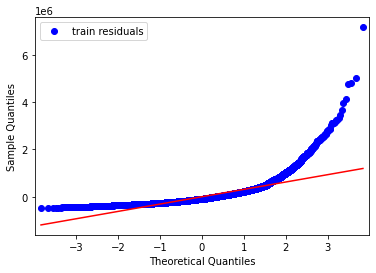

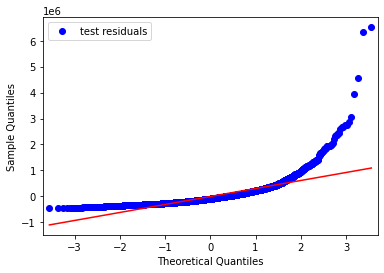

In [49]:
baseline_train_preds = [train_target_mean]*len(y_train)
baseline_test_preds = [train_target_mean]*len(y_test)
evaluate(y_train, baseline_train_preds, y_test, baseline_test_preds)

In [50]:
# code here for your first 'substandard' model
fsm_X_train= X_train['sqft_living']
fsm_X_test = X_test['sqft_living']
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()
fsm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:51:27   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.4906
Test R2: 0.4989
*****
Train RMSE: $261,471.87
Train RMSE: $262,216.52
*****
Train MAE: $174,170.69
Train MAE: $171,964.83
*****


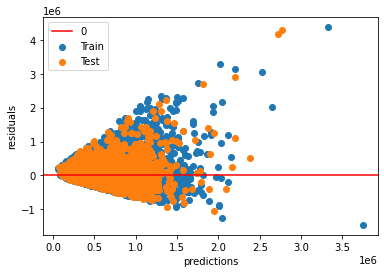

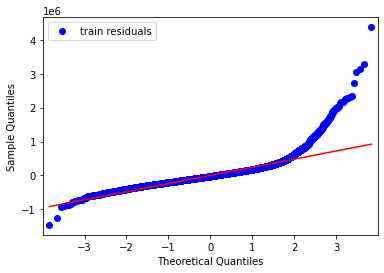

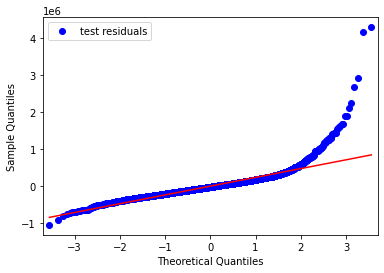

In [51]:
# code here to evaluate your first 'substandard' model
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

In [52]:
logged_fsm_y_train= np.log(y_train)
logged_fsm_y_test = np.log(y_test)
fsm_logged = sm.OLS(logged_fsm_y_train, sm.add_constant(fsm_X_train)).fit()
fsm_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:51:28   Log-Likelihood:                -7274.1
No. Observations:               16197   AIC:                         1.455e+04
Df Residuals:                   16195   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2179      0.007   1653.638      0.000      12.203      12.232
sqft_living     0.0004   3.24e-06    123.040      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.122
Skew:                           0.025   Prob(JB):                        0.346
Kurtosis:                       3.026   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.4831
Test R2: 0.4836
*****
Train RMSE: $0.38
Train RMSE: $0.38
*****
Train MAE: $0.31
Train MAE: $0.31
*****


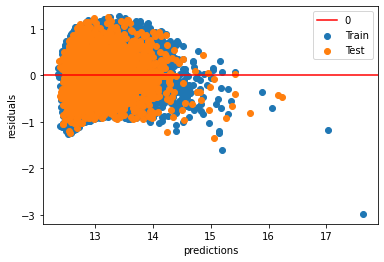

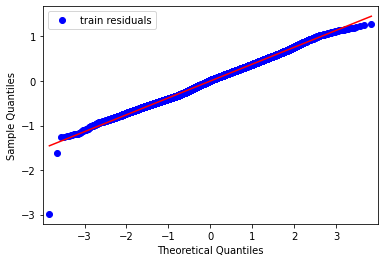

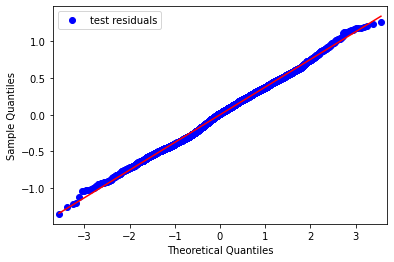

In [53]:
logged_fsm_train_preds = fsm_logged.predict(sm.add_constant(fsm_X_train))
logged_fsm_test_preds = fsm_logged.predict(sm.add_constant(fsm_X_test))

evaluate(logged_fsm_y_train, logged_fsm_train_preds, logged_fsm_y_test, logged_fsm_test_preds)

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [64]:
# code here to arrive at a baseline predic

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [62]:
# code here for your first 'substandard' model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1250.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):          8.63e-264
Time:                        14:04:30   Log-Likelihood:            -2.2989e+05
No. Observations:               16197   AIC:                         4.598e+05
Df Residuals:                   16195   BIC:                         4.598e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.331e+05   2783.149    191.560      0.000    5.28e+05    5.39e+05
waterfront  1.189e+06   3.36e+04     35.353      0.000    1.12e+06    1.25e+06
==============================================================================
Omnibus:                    12979.150   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           590377.316
Skew:                           3.512   Prob(JB):                         0.00
Kurtosis:                      31.731   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [72]:
sql15_X_train= X_train['sqft_living15']
sql15_X_test = X_test['sqft_living15']
sql15 = sm.OLS(y_train, sm.add_constant(sql15_X_train)).fit()
sql15.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     8700.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:37:14   Log-Likelihood:            -2.2701e+05
No. Observations:               16197   AIC:                         4.540e+05
Df Residuals:                   16195   BIC:                         4.540e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.699e+04   7124.905    -12.210      0.000   -1.01e+05    -7.3e+04
sqft_living15   316.0656      3.389     93.272      0.000     309.423     322.708
==============================================================================
Omnibus:                    14146.878   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005637.155
Skew:                           3.862   Prob(JB):                         0.00
Kurtosis:                      40.821   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.3394
Test R2: 0.3155
*****
Train RMSE: $297,742.18
Train RMSE: $306,456.61
*****
Train MAE: $180,350.06
Train MAE: $180,677.96
*****


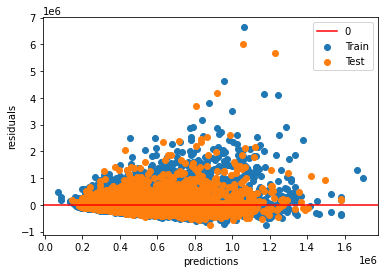

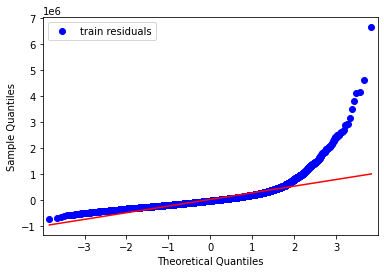

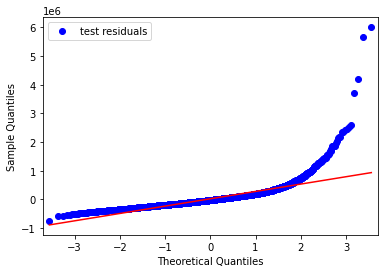

In [73]:
# code here to evaluate your first 'substandard' model
sql15_train_preds = fsm.predict(sm.add_constant(sql15_X_train))
sql15_test_preds = fsm.predict(sm.add_constant(sql15_X_test))

evaluate(y_train, sql15_train_preds, y_test, sql15_test_preds)


In [90]:
X.drop('date',1,inplace =True)

In [96]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k =4)
selector.fit(X_train, logged_fsm_y_train)
X_train.columns[selector.get_support()]


Index(['sqft_living', 'sqft_above', 'zipcode', 'sqft_living15'], dtype='object')

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [12]:
# code here to show your final model

In [13]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
